In [33]:
import pandas as pd

In [34]:
#농어의 length, height, width
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')
perch_full = df.to_numpy()
print(perch_full.shape)
print(perch_full)


(56, 3)
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.

In [35]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [36]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(42, 3) (14, 3) (42,) (14,)


In [37]:
from sklearn.preprocessing import PolynomialFeatures
#객체화
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [38]:
#bias 없애는..
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [39]:
#속성이 많아지면 예측하기 쉬운데 복잡하게 하기 위해서 어거지로 속성을 늘린거임
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
print(train_poly)

(42, 9)
[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      1

In [40]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [41]:

test_poly = poly.transform(test_input)
print(test_poly.shape)
print(test_poly)

(14, 9)
[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))
#테스트 세트에 대한 점수는 높아지지 않았지만 과소적합 문제는 더 이상 나타나지 않음

0.9903183436982124
0.9714559911594145


In [43]:
#속성을 더 늘려서 복잡하게 어거지로
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
print(poly.get_feature_names_out())
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(train_poly)

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']
(42, 55)
[[1.96000000e+01 5.14000000e+00 3.04000000e+00 ... 7.42244501e+02
  4.38992857e+02 2.59637799e+02]
 [2.20000000e+01 5.88000000e+00 3.52000000e+00 ... 1.50793507e+03
  9.02709432e+02 5.40397483e+02]
 [1.87000000e+01 5.20000000e+00 3.12000000e+00 ... 8.21240709e+02
  4.92744425e+02 2.95646655e+02]
 ...
 [2.56000000e+01 6.56000000e+00 4.24000000e+00 ... 3.28023719e+03
  2.12015331e+03 1.37034299e+03]
 [4.20000000e+01 1.28000000e+01 6.8

In [44]:
# train set에 오차가 거의 없이 맞춰졌지만 역설적이게 test set에서는 오차가 커지는 과대적합이 생김
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996176
-144.40585108215134


In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) #학습한 후에
train_scaled = ss.transform(train_poly) #mean / std이 다르기 때문에 train과 test를 나눠서 진행
test_scaled = ss.transform(test_poly)
print(train_scaled[:1,:], test_scaled[:1,:])

[[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
  -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
  -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
  -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
  -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
  -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
  -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
  -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
  -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
  -0.75143746]] [[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344

In [46]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615379


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


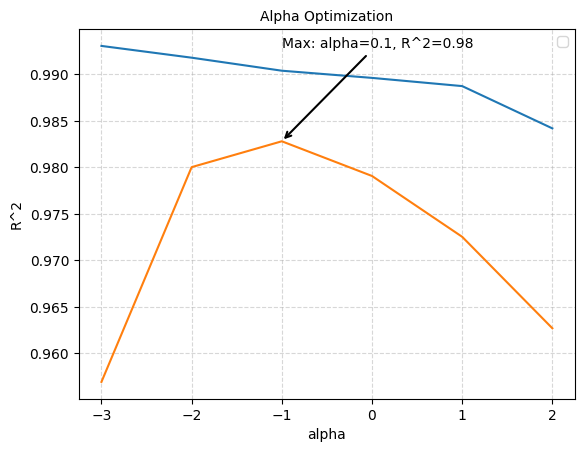

In [71]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    
fig, ax = plt.subplots()
ax.plot(np.log10(alpha_list), train_score)
ax.plot(np.log10(alpha_list), test_score)

ax.set_xlabel('alpha')
ax.set_ylabel('R^2')
ax.set_title('Alpha Optimization', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)

max_index = np.argmax(test_score)
max_alpha = alpha_list[max_index]
max_score = test_score[max_index]

ax.annotate(f'Max: alpha={max_alpha}, R^2={max_score:.2f}', xy=(np.log10(max_alpha), max_score), xytext=(np.log10(max_alpha), max_score+0.01),
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.5))

ax.legend()
plt.show()


In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570368
0.9827976465386983


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


c:\Users\rhkr3\anaconda3\envs\pandas_jm\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rhkr3\anaconda3\envs\pandas_jm\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


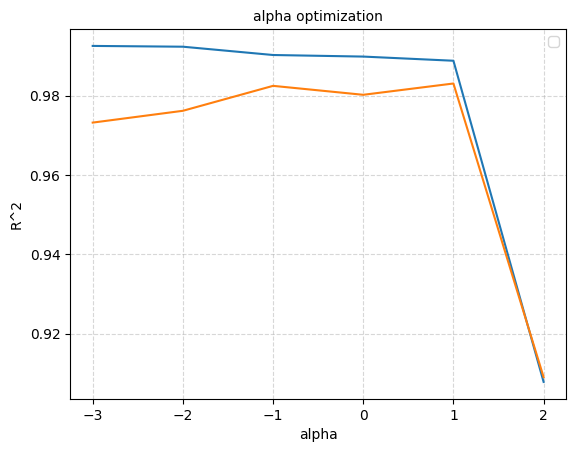

In [54]:
train_score= []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter =10000)
    lasso.fit(train_scaled, train_target)
    
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))
    
fig, ax = plt.subplots()
ax.plot(np.log10(alpha_list), train_score)
ax.plot(np.log10(alpha_list), test_score)


# 축 레이블 설정
ax.set_xlabel('alpha')
ax.set_ylabel('R^2')

# 제목 설정
ax.set_title('alpha optimization', fontsize=10)

# 그리드 표시
ax.grid(True, linestyle='--', alpha=0.5)


# 주석 추가
ax.annotate('local max', xy=(0, 0), xytext=(100, 800), arrowprops=dict(facecolor='black', shrink=0.05))

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()


In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ ==0))
print(lasso.coef_)
#라쏘는 계수를 0으로 만들 수 있는데 이는 차원축소라고도 할 수 있음.

40
[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
